# 🧠 ExtraaLearn Project

## 🧾 Context

The EdTech industry has grown tremendously 📈 over the last decade. A forecast predicts the **online education market** will reach **$286.62B by 2023** with a **CAGR of 10.26%** (2018–2023).

Thanks to features like:
- ⚡ Easy information sharing
- 🎯 Personalized learning
- 📊 Transparent assessments

Online learning is now often preferred over traditional education.

📌 Due to COVID-19, the online education sector experienced rapid growth, attracting many new users.  
💼 Many startups have entered the EdTech space, leveraging **digital marketing** to attract leads.

**How leads are generated:**
- 📱 Social media or online platform interactions
- 🌐 Website/app browsing & brochure downloads
- ✉️ Email inquiries

🗣️ Leads are then contacted via call or email to nurture and convert them into **paying customers**.

---

## 🎯 Objective

You are a **data scientist** at **ExtraaLearn**, an early-stage EdTech startup offering programs on cutting-edge technologies.

With many leads generated daily, the company wants to **optimize resource allocation** by focusing on leads more likely to convert.

### Your tasks:
1. 🤖 **Build an ML model** to predict which leads will likely convert to paying customers.  
2. 🔍 **Identify key factors** that influence conversion.  
3. 🧬 **Create a lead profile** of those most likely to convert.

---

## 📊 Data Description

The dataset contains attributes of leads and how they interact with ExtraaLearn.

### 🗂️ **Data Dictionary**

| Variable                | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| 🆔 `ID`                  | Unique identifier of the lead                                               |
| 🎂 `age`                | Age of the lead                                                             |
| 👔 `current_occupation`| Current occupation: **Professional**, **Unemployed**, **Student**           |
| 🧭 `first_interaction` | Where the lead first interacted: **Website** or **Mobile App**              |
| 📋 `profile_completed` | Profile completion level: **Low**, **Medium**, **High**                     |
| 🌐 `website_visits`    | Number of times the lead visited the website                                |
| ⏱️ `time_spent_on_website` | Total time the lead spent browsing the website                       |
| 📄 `page_views_per_visit` | Average number of pages viewed per website visit                      |
| 🕹️ `last_activity`     | Last interaction type:                                                      |
|                         |   - ✉️ **Email Activity** (info request, brochure sharing)                  |
|                         |   - 📞 **Phone Activity** (calls or SMS with rep)                           |
|                         |   - 🌍 **Website Activity** (live chat, profile updates)                    |
| 📰 `print_media_type1`  | Did they see ExtraaLearn in a **newspaper**? (Yes/No)                      |
| 📓 `print_media_type2`  | Did they see ExtraaLearn in a **magazine**? (Yes/No)                       |
| 💻 `digital_media`      | Did they see ExtraaLearn on **digital platforms**?                         |
| 🎓 `educational_channels`| Did they hear about ExtraaLearn on **educational sites/forums**?         |
| 🤝 `referral`           | Did they come through a **referral**?                                      |
| 💳 `status`             | Were they **converted to paid customers**? (`0` = No, `1` = Yes)            |


# IMPORT AND READ FILE

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier




In [ ]:
# Read the file
dt = pd.read_csv("/content/ExtraaLearn.csv")
dt.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### 🎯 **Goals**

1. 🤖 **Analyze and build a Machine Learning model** to identify which potential leads are most likely to become paying customers.  
2. 🔍 **Identify key factors** that drive the lead conversion process.  
3. 🧬 **Create a lead profile** of those most likely to convert.


# DATA EXPLORATION

In [ ]:
dt.info() # General information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
dt.describe().T
# We just have 5 numerical features and 9 categorical features

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [ ]:
dt.isnull().sum()
# We don't have nulls

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [ ]:
dt[dt.duplicated]

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status


We don't have any duplicate data or null

## Univariate

In [ ]:
### Numerical

In [ ]:
data_num = dt.select_dtypes(include = [np.number])
data_num.columns
# We select our numerical data

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')


 age 



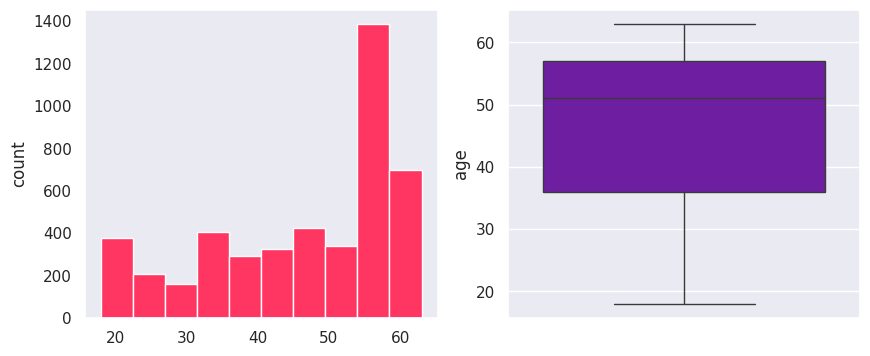


 website_visits 



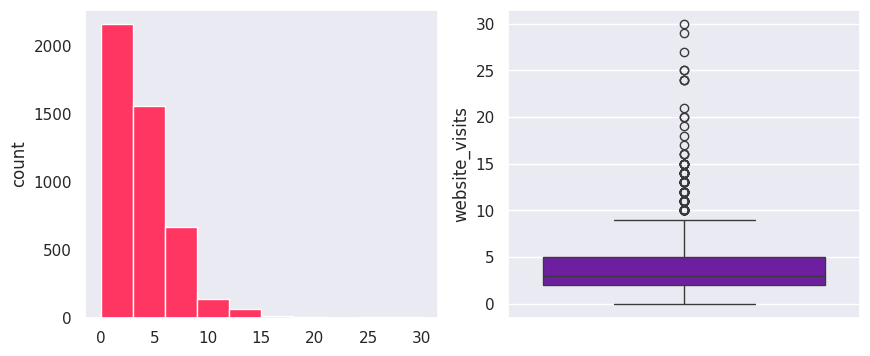


 time_spent_on_website 



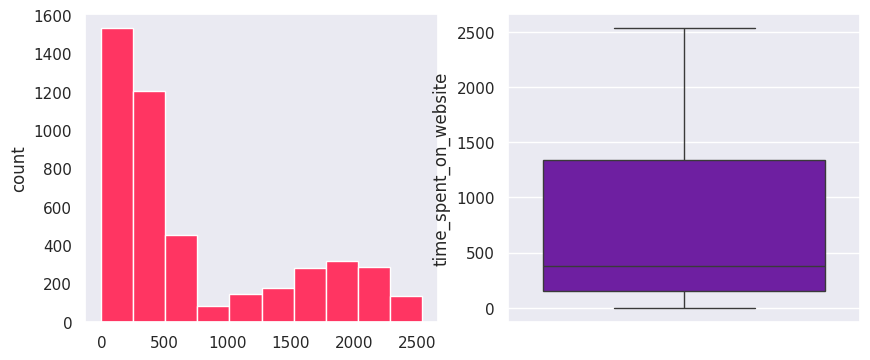


 page_views_per_visit 



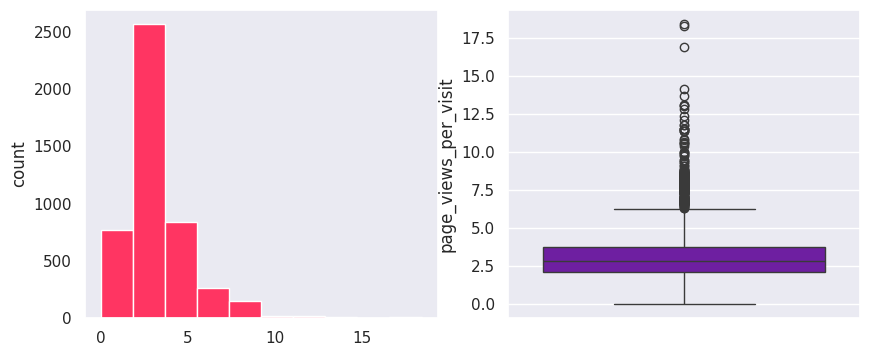


 status 



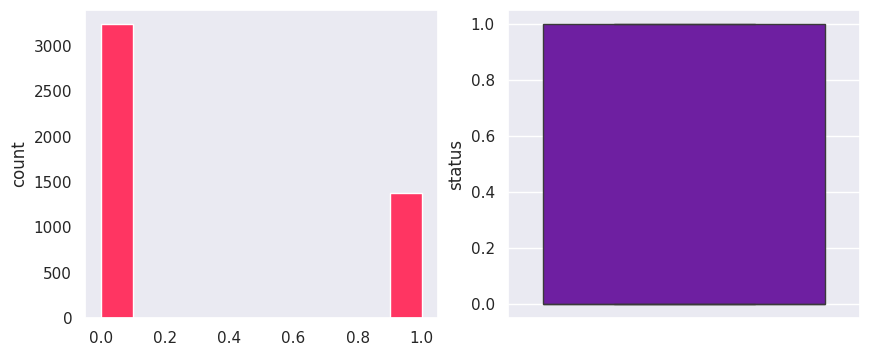

In [ ]:
# Plot our barplot and boxplot for understanding patterns

for i in data_num.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  data_num[i].hist(bins=10, grid=False, color = '#ff3562')
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(data_num[i], color = '#7209b7')
  plt.show()


 age 



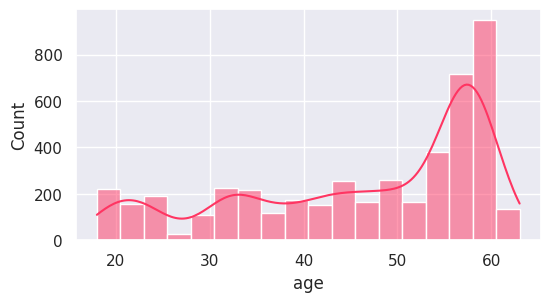


 website_visits 



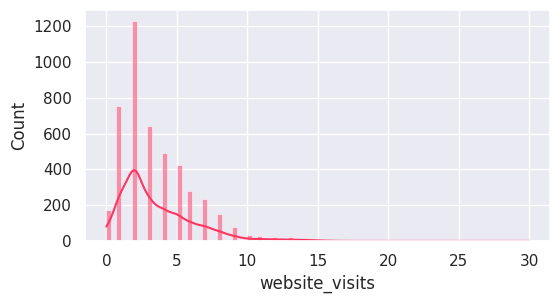


 time_spent_on_website 



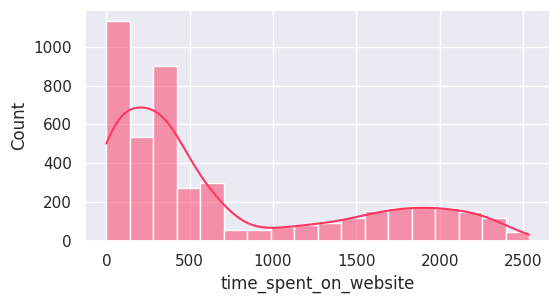


 page_views_per_visit 



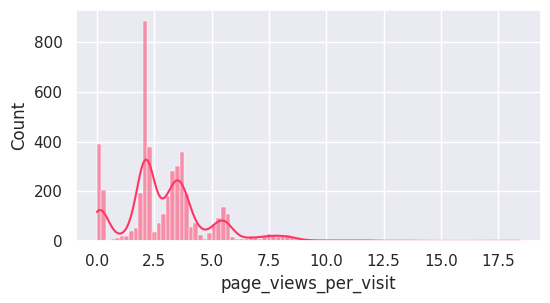


 status 



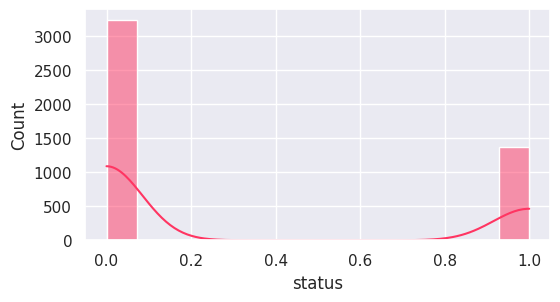

In [ ]:
for i in data_num.columns: # Plor histogram to find patterns
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (6,3))
  plt.subplot(1,1,1)
  sns.histplot(data = data_num, x = i, kde= True, color = '#ff3562')
  plt.show()

### 🎂 **AGE**
- ✅ No outliers detected  
- 👴 The audience is mostly over **50 years old**

---

### 🌐 **Web Visits**
- ⚠️ Several **outliers detected**  
- 📊 Data is concentrated between **0 and 5 visits**

---

### ⏱️ **Time on Website**
- ✅ No outliers detected  
- ⌛ Values concentrated between **0 and 500 time units**

---

### 📄 **Page Views per Visit**
- ⚠️ **Outliers present**  
- 👁️‍🗨️ Data is concentrated between **2.5 and 5 views**

---

### 🧮 **Status**
- 🔢 **Binary classification**: `[0, 1]`


### Categorical variables

In [ ]:
cat_v = dt.select_dtypes(include = ['object']) # Select categorical variables only
cat_v.columns

Index(['ID', 'current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')

In [ ]:
cat_v.nunique()
# ID is not important for our EDA, it does not represent any patter, later we
# are gonna delete this feature of our dataset dt

,0
ID,4612
current_occupation,3
first_interaction,2
profile_completed,3
last_activity,3
print_media_type1,2
print_media_type2,2
digital_media,2
educational_channels,2
referral,2


In [ ]:
# Run just once

cat_v.drop('ID', axis = 1, inplace = True)
cat_v.columns

Index(['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')


 current_occupation 



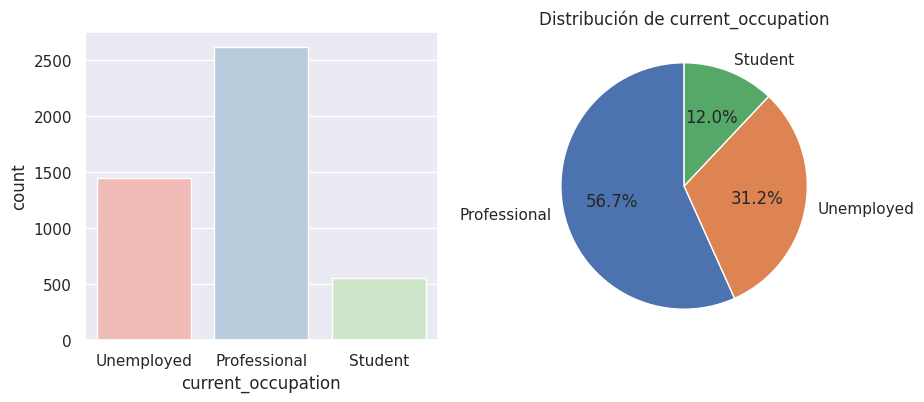


 first_interaction 



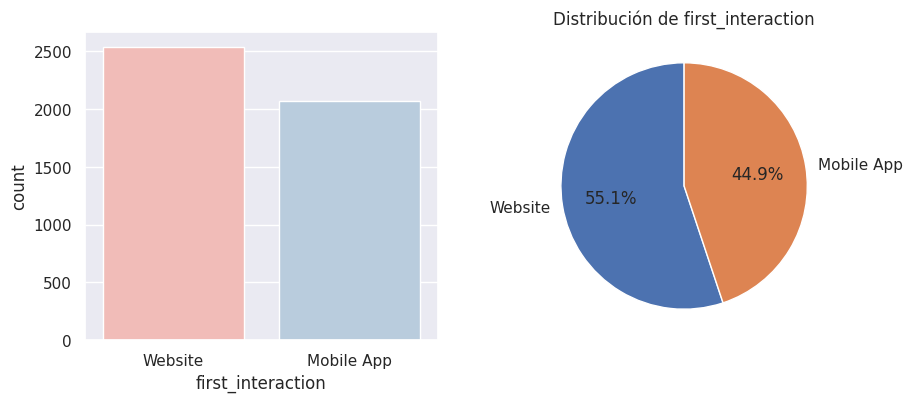


 profile_completed 



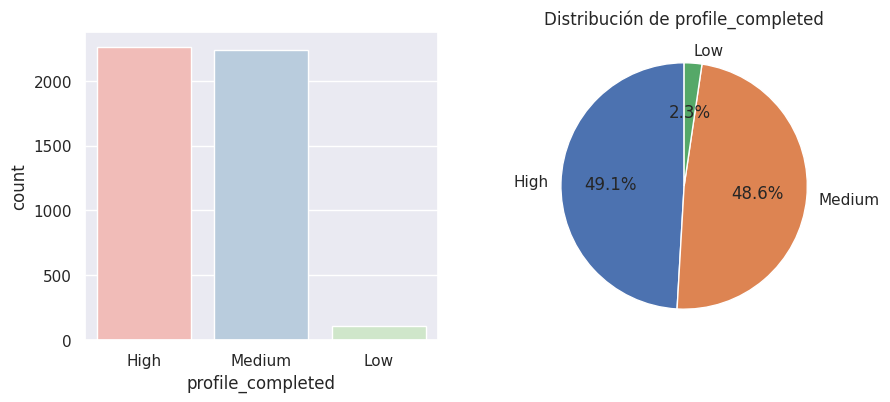


 last_activity 



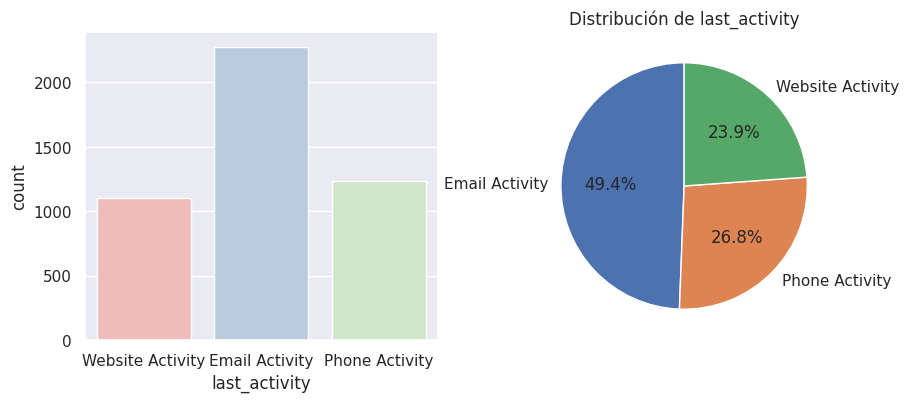


 print_media_type1 



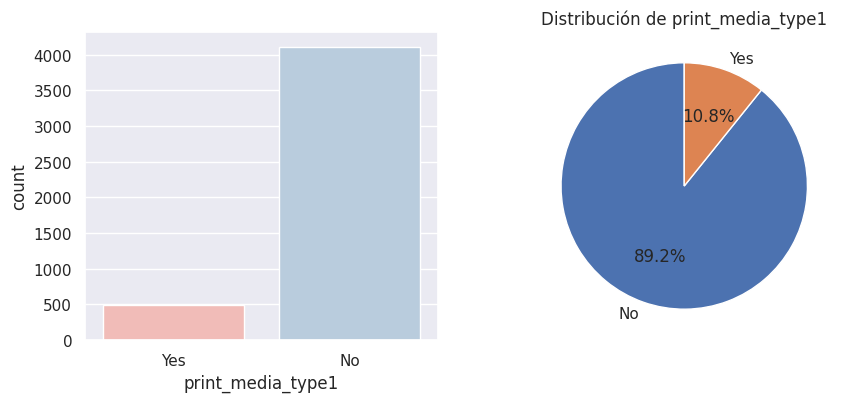


 print_media_type2 



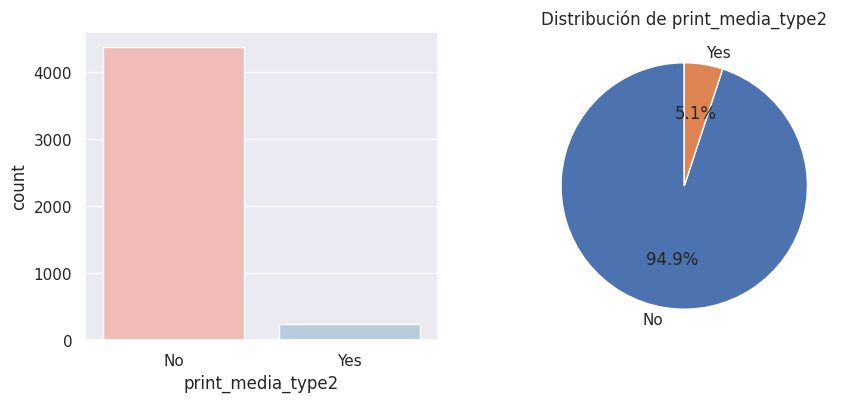


 digital_media 



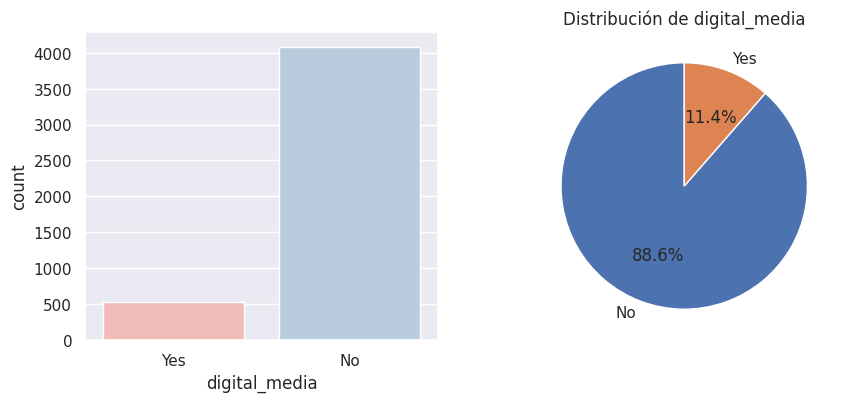


 educational_channels 



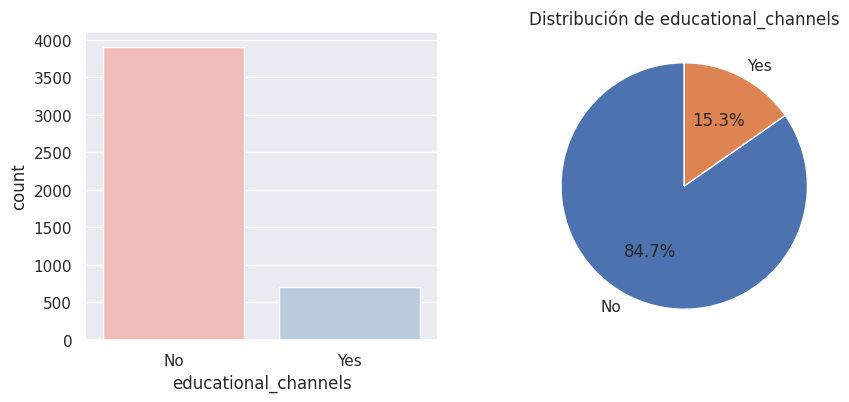


 referral 



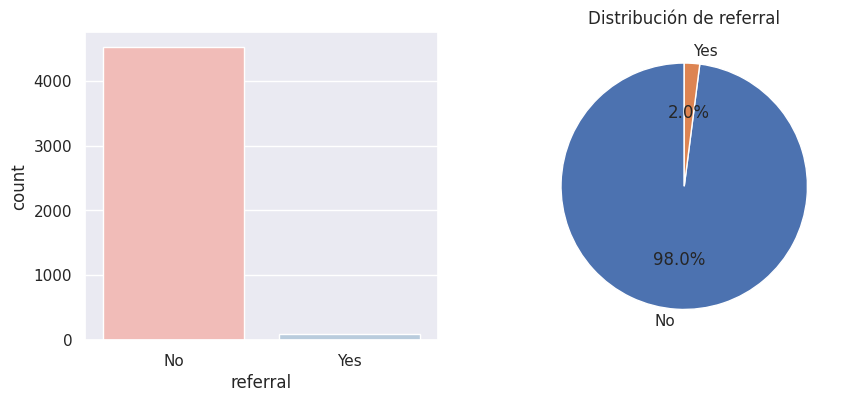

In [ ]:
for i in cat_v.columns: # With our categorical variables we plot counplots and pie chart to find percentages
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  sns.countplot(x = i, data = cat_v, hue=i,  palette = "Pastel1", legend=False ); # <- Modificado
  counts = cat_v[i].value_counts()

  plt.subplot(1,2,2)
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribución de {i}')


  plt.show()

### 👤 **Current Occupation**
- 👨‍💼 **Professionals**: 56.7%  
- 🎓 **Students**: 12%  
- 🔍 **Unemployed**: 31.2%

---

### 🧭 **First Interaction**
- 🌐 **Website**: 55.1%  
- 📱 **Mobile App**: 44.9%

---

### 🧩 **Profile Completion**
- 🔵 **High**: 49.1%  
- 🟠 **Medium**: 48.6%  
- 🔴 **Low**: 2.3%

---

### 🕒 **Last Activity**
- 🌍 **Website**: 49.4%  
- ✉️ **Email**: 26.8%  
- 📞 **Phone**: 23.9%

---

### 📰 **Printed Media**
- 📄 **Type 1**: 10.8% use it | 89.2% don’t  
- 📑 **Type 2**: 5.1% use it | 94.9% don’t

---

### 💻 **Digital Media & 📚 Educational Channels**
- 💻 **Digital Media**: 11.4% use it | 88.6% don’t  
- 🎓 **Educational Channels**: 15.3


## BIVARIATE ANALYSIS
(Numerical data)

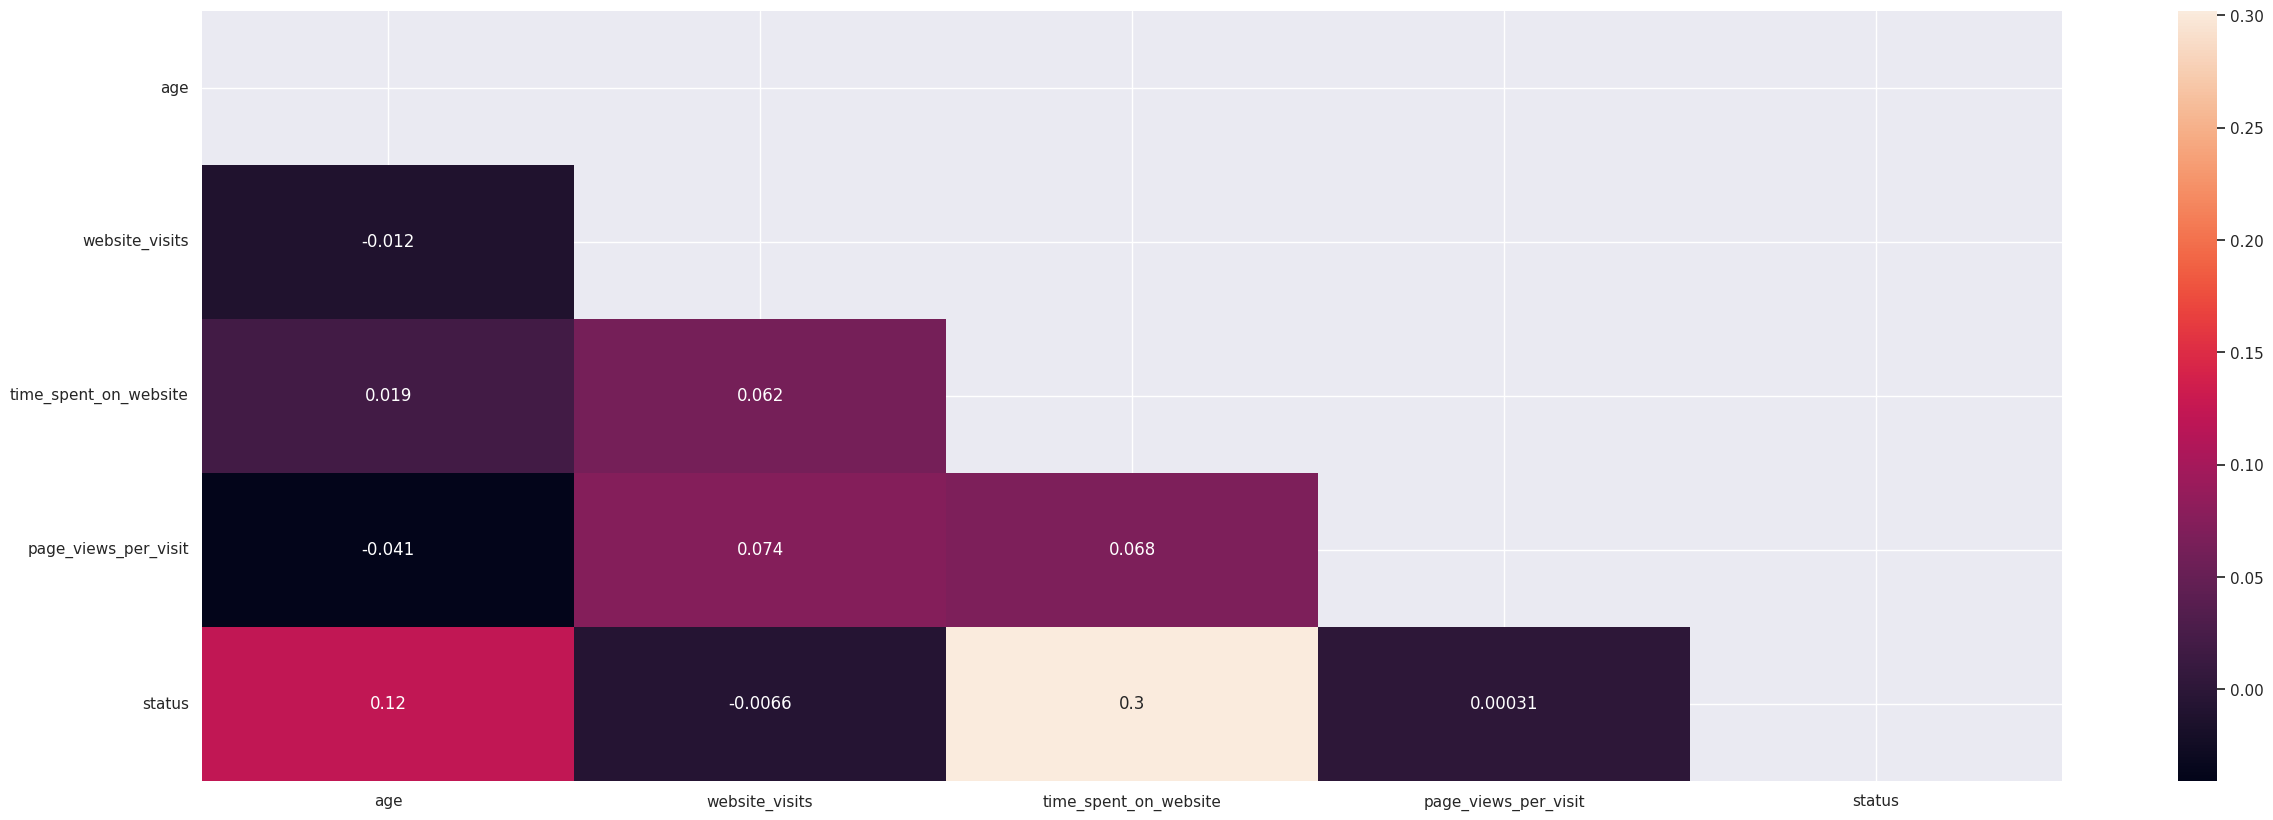

In [ ]:
mask = np.triu(np.ones_like(data_num.corr()))
# Plot our correlation matrix, only up triangle, for not repeat data beacuse it's symetric
sns.set(style ='darkgrid')
plt.figure(figsize = (30,10))
sns.heatmap(data_num.corr(),  annot= True, mask = mask);


### 📈 Correlation Analysis

- 🔗 There is **no significant correlation** between **`age`** and **`website_visits`**.
  
- 📊 A **small relationship** exists between:
  - 🕒 `time_spent_on_website` and `page_views_per_visit`: **0.074**
  - 🕒 `time_spent_on_website` and `website_visits`: **0.062**

- ✅ `status` (conversion):
  - Has a **moderate positive correlation** with `time_spent_on_website`: **0.3**
  - Has a **weaker positive correlation** with `age`: **0.12**

---

### 🧠 Conclusion

Most relationships in the data are **weak**,  
but the **strongest correlation** is between **`status` and `time_spent_on_website`**,  
suggesting that users who spend more time on the website are more likely to convert.


## 🧹 Data Preprocessing

### 1️⃣ Drop Unnecessary Variables
- Remove columns that do not contribute to modeling (e.g., IDs, duplicates, etc.)

### 2️⃣ Handle Categorical Variables
- ✅ Apply **One-Hot Encoding** if needed (e.g., for `occupation`, `first_interaction`, `profile_completed`, etc.)

### 3️⃣ Outlier Treatment
- 🚫 **Remove or cap outliers** in numerical features like:
  - `website_visits`
  - `time_spent_on_website`
  - `page_views_per_visit`

### 4️⃣ Fix Skewed Distributions
- 📐 Apply **log transformation** or **power transform** to fix skewness in features like:
  - `time_spent_on_website`

### 5️⃣ Feature Engineering
- 🧠 Create new meaningful features if applicable (e.g., interaction ratio, time/view ratios, etc.)

### 6️⃣ Normalize/Scale Data
- 📏 Standardize or normalize features to improve model performance (especially for distance-based algorithms)

### 7️⃣ Final Clean-Up
- ❌ Handle missing values
- ✅ Check data types
- 🔁 Ensure consistent formatting


##### 1. Data Imputation

In [ ]:
dt1 = dt.copy()
dt1.drop(['ID'], inplace = True, axis = 1) #Just run once '''
dt1.columns
# In this case we just need delete ID feature, it does not represent any. WIth
# our decision tree model we can prune some features that are not meaningful

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')

##### 2. One Hot:

In [ ]:
dt1.select_dtypes(exclude = [np.number]).columns.tolist()
# Select categorial data, as orur data nominal we use One hot

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [ ]:
dt1.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
dt1.current_occupation.unique().size

3

In [ ]:
cat_dt1 =  ['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

 # One hot

dt1_encoded = pd.get_dummies(dt1, columns = cat_dt1, )
for col in dt1_encoded.select_dtypes(include='bool').columns:
  dt1_encoded[col] = dt1_encoded[col].astype(int)
dt1_encoded.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status', 'current_occupation_Professional',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'first_interaction_Mobile App', 'first_interaction_Website',
       'profile_completed_High', 'profile_completed_Low',
       'profile_completed_Medium', 'last_activity_Email Activity',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_No', 'print_media_type1_Yes', 'print_media_type2_No',
       'print_media_type2_Yes', 'digital_media_No', 'digital_media_Yes',
       'educational_channels_No', 'educational_channels_Yes', 'referral_No',
       'referral_Yes'],
      dtype='object')

In [ ]:
dt1_encoded.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,1,0,0,1,0,1,...,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.320,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.074,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.057,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.914,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


##### 3. Remove Outliers:

In our try, it just preserves 35% of our data, so we should not use this method

In [ ]:
'''Q1 = dt1_encoded[['website_visits', 'page_views_per_visit']].quantile(0.25)
Q3 = dt1_encoded[['website_visits', 'page_views_per_visit']].quantile(0.75)
IQR = Q3 - Q1

dt1_encoded_filtered = dt1_encoded[
    ~((dt1_encoded[['website_visits', 'page_views_per_visit']] < (Q1 - 1.5 * IQR)) | (
           dt1_encoded[['website_visits', 'page_views_per_visit']] > (Q3 + 1.5 * IQR))).any(axis=1)]

dt1_encoded_filtered.shape
#dt.shape'''


"Q1 = dt1_encoded[['website_visits', 'page_views_per_visit']].quantile(0.25)\nQ3 = dt1_encoded[['website_visits', 'page_views_per_visit']].quantile(0.75)\nIQR = Q3 - Q1\n\ndt1_encoded_filtered = dt1_encoded[\n    ~((dt1_encoded[['website_visits', 'page_views_per_visit']] < (Q1 - 1.5 * IQR)) | (\n           dt1_encoded[['website_visits', 'page_views_per_visit']] > (Q3 + 1.5 * IQR))).any(axis=1)]\n\ndt1_encoded_filtered.shape\n#dt.shape"

In [ ]:

dt1_encoded.shape

(4612, 26)

In [ ]:
# Capping: We change outliers for limit values

lower_5_visits = dt1_encoded['website_visits'].quantile(0.05)
upper_95_visits = dt1_encoded['website_visits'].quantile(0.95)

lower_5_page_views = dt1_encoded['page_views_per_visit'].quantile(0.05)
upper_95_page_views = dt1_encoded['page_views_per_visit'].quantile(0.95)

dt1_encoded['website_visits'] = dt1_encoded['website_visits'].clip(lower=lower_5_visits, upper=upper_95_visits)

dt1_encoded['page_views_per_visit'] = dt1_encoded['page_views_per_visit'].clip(lower=lower_5_page_views, upper=upper_95_page_views)

dt1_encoded.shape

# We have our dataset with some changes in our outliers



(4612, 26)

In [ ]:
dt1_encoded.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status', 'current_occupation_Professional',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'first_interaction_Mobile App', 'first_interaction_Website',
       'profile_completed_High', 'profile_completed_Low',
       'profile_completed_Medium', 'last_activity_Email Activity',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_No', 'print_media_type1_Yes', 'print_media_type2_No',
       'print_media_type2_Yes', 'digital_media_No', 'digital_media_Yes',
       'educational_channels_No', 'educational_channels_Yes', 'referral_No',
       'referral_Yes'],
      dtype='object')

#### 4. SMOTE TECHINQUE:
To avoid biases and also improve class imbalance.


In [ ]:
X = dt1_encoded.drop('status', axis = 1)
y = dt1_encoded['status']

In [ ]:
X, y = SMOTE().fit_resample(X, y)
## Apply SMOTE to oversample the minority class and balance the dataset


In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([3235, 3235]))

#### 5. NORMALIZATION:
As we had outliers and skewed information we have to normlice with **Log transformation**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1.Logaritmic transformation
X_transformed = np.log1p(X)

# 2. Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_transformed)

X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.head() # Chande to dataframe

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,0.918942,0.861353,0.944295,0.493249,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.904622,0.251930,0.565218,0.100650,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.844710,0.430677,0.740148,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.860101,0.569323,0.783510,0.526880,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.192364,0.569323,0.816238,1.000000,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Splitting data

70% training and 30% testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Models

## Decision Tree

Let's check with our train dataset

In [ ]:
''' CHECK IN TRAIN DATASET '''

DCT = DecisionTreeClassifier(max_leaf_nodes=18) #Pre - pruning
# Here we just use one parameter, to prune the tree

DCT.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=18)

In [ ]:
y_pred1 = DCT.predict(X_train)
print(classification_report(y_train, y_pred1))

matrix1 = accuracy_score(y_pred1,y_train)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2260
           1       0.93      0.86      0.90      2269

    accuracy                           0.90      4529
   macro avg       0.90      0.90      0.90      4529
weighted avg       0.90      0.90      0.90      4529



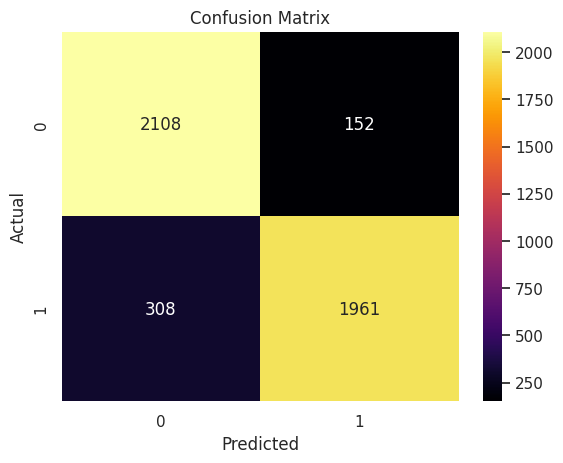

In [ ]:
cm = confusion_matrix(y_train, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Decision Tree accuracy is: {:.2f}%'.format(matrix1*100))

Decision Tree accuracy is: 89.84%


Let's check our test dataset

In [ ]:
y_pred = DCT.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       975
           1       0.92      0.85      0.88       966

    accuracy                           0.89      1941
   macro avg       0.89      0.89      0.89      1941
weighted avg       0.89      0.89      0.89      1941



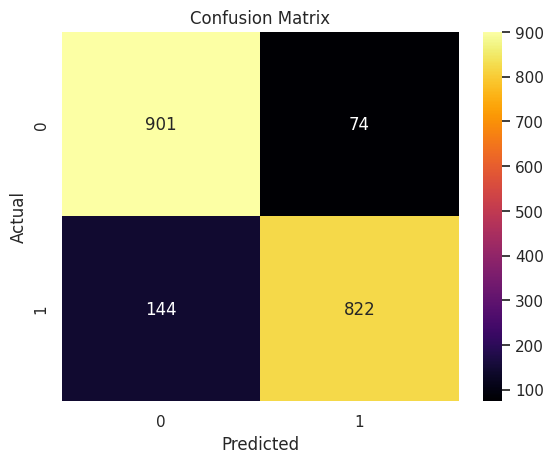

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Decision Tree accuracy is: {:.2f}%'.format(matrix*100))

Decision Tree accuracy is: 88.77%


In conclusion, our model is good beacause does not face overfitting and has a good accuracy in both.
- The gap is not significant
- Good class balance

#### **Plot tree**

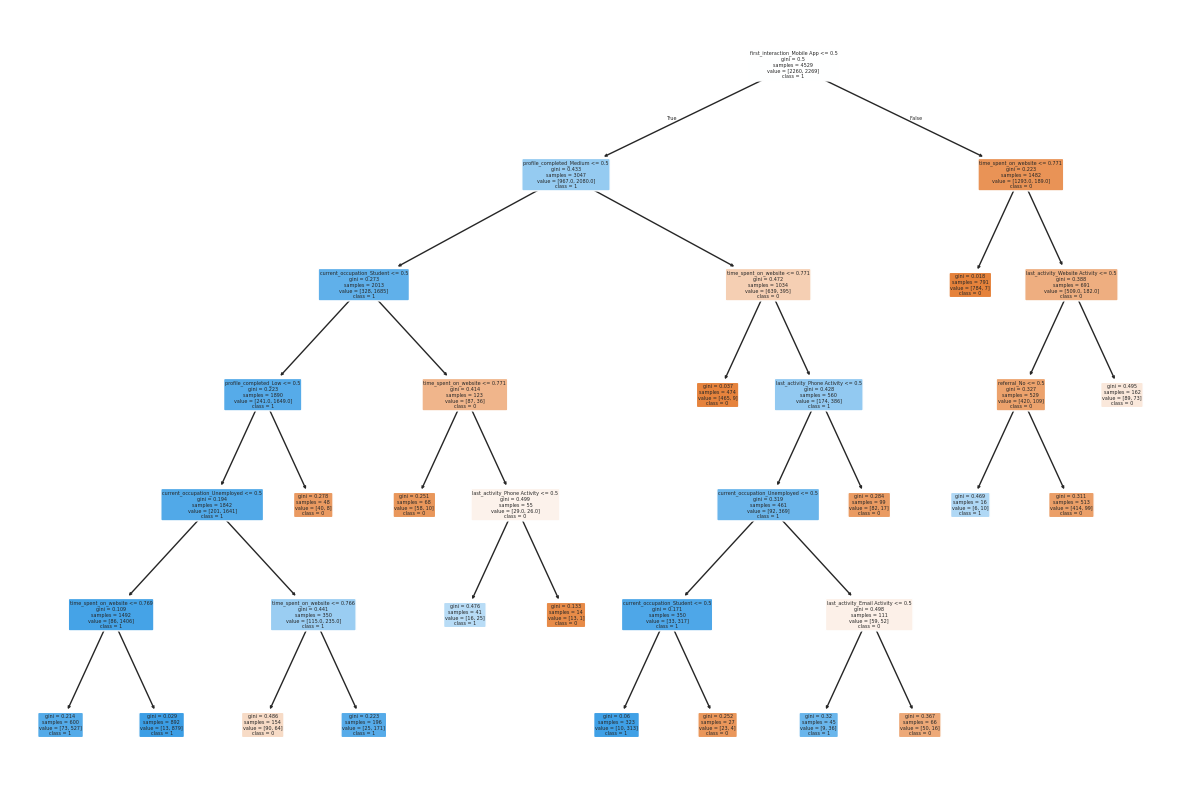

In [ ]:
## PLOT TREE

plt.figure(figsize=(15, 10))
plot_tree(DCT, filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns)

plt.show()


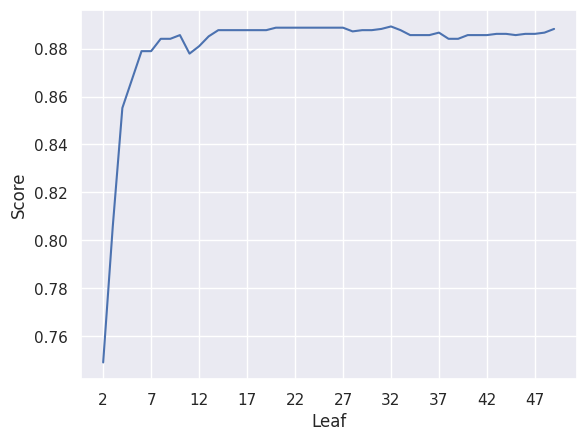

Decision tree Max accuracy 88.92%


In [ ]:
score_list = []
for i in range(2, 50):
    class_tree = DecisionTreeClassifier(max_leaf_nodes=i)
    class_tree.fit(X_train, y_train)
    score_list.append(class_tree.score(X_test, y_test))

plt.plot(range(2, 50), score_list)
plt.xticks(np.arange(2, 50, 5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()

DTAccMax = max(score_list)
print("Decision tree Max accuracy {:.2f}%".format(DTAccMax * 100))

- For finding and optimal number of leaf, we plot in the last one the number. For avoiding overfitting, we decide few leaf. In this case 18.
- As the same time we increase number of leaf, the model can predict better, but it does not mean it performs correctly and can do overfitting.
- We select optimal number of leave **18**

####**Hyperparameter Tuning**: GridSearchCV to find optimal max_depth

In [ ]:
parameter = {
    'criterion' :['gini', 'entropy'],
    'splitter':['best'],
    'max_depth':[2, 3, 4],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
model = DecisionTreeClassifier()
grid_cv = GridSearchCV(model, param_grid = parameter,cv = 5)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best']})

In [ ]:
accuracy = grid_cv.score(X_test, y_test)
print("Accuracy of the pruned decision tree: {:.2f}%".format(accuracy * 100))

Accuracy of the pruned decision tree: 88.51%


In my initial decision tree model, I used a fixed configuration with max_leaf_nodes=18 and achieved an accuracy of 88.77%. Later, I applied **GridSearchCV**, which took the same type of model and tested different combinations of hyperparameters like max_depth, min_samples_split, and criterion to find the best possible setup. Although the model tuned with GridSearch had a slightly lower accuracy (88.51%), it was validated through multiple training splits, making it more robust and better at generalizing to new data.


#### Random Forest

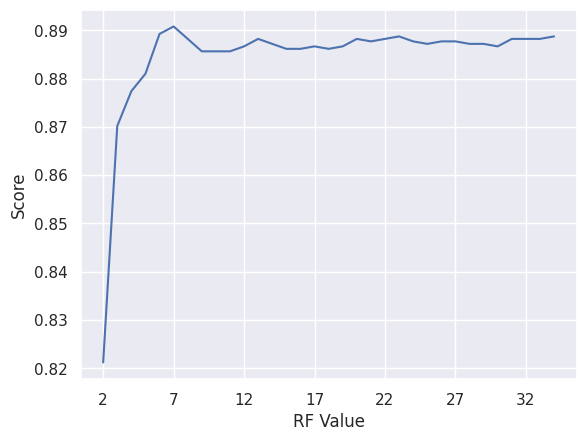

In [ ]:
scoreListRF = []
for i in range(2,35):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,35), scoreListRF)
plt.xticks(np.arange(2,35,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

In [ ]:
best_index = np.argmax(scoreListRF)
best_number_leaves = range(2, 50)[best_index]
best_score = scoreListRF[best_index]
print(f"Best number of leaves: {best_number_leaves}\n Accuracy: {round(best_score*100,2)}%")


Best number of leaves: 7
 Accuracy: 89.08%


We plotted the performance to find the optimal number of leaf nodes and identified 7 as the best value. Therefore, we used max_leaf_nodes=7 in our final Random Forest model.


In [ ]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=7)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=7)

Test dataset

In [ ]:
y_predr = RFclassifier.predict(X_test)

print(classification_report(y_test, y_predr))

RFAcc_test = accuracy_score(y_predr,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc_test*100))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       975
           1       0.88      0.90      0.89       966

    accuracy                           0.89      1941
   macro avg       0.89      0.89      0.89      1941
weighted avg       0.89      0.89      0.89      1941

Random Forest accuracy is: 89.03%


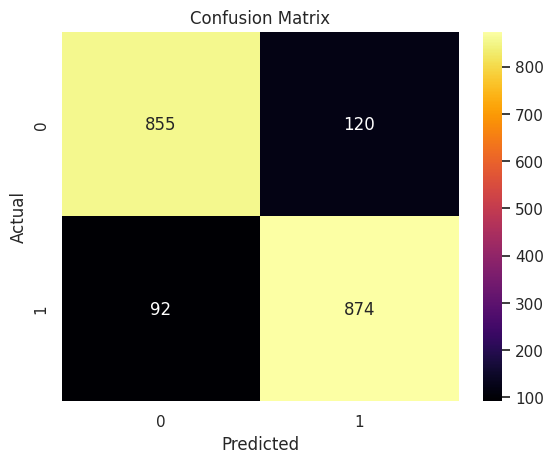

In [ ]:
cm = confusion_matrix(y_test, y_predr)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Train dataset

In [ ]:
y_pred1r = DCT.predict(X_train)
print(classification_report(y_train, y_pred1r))
RFAcc_train = accuracy_score(y_pred1r,y_train)
print('Random forest  accuracy is: {:.2f}%'.format(RFAcc_train*100))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2260
           1       0.93      0.86      0.90      2269

    accuracy                           0.90      4529
   macro avg       0.90      0.90      0.90      4529
weighted avg       0.90      0.90      0.90      4529

Random forest  accuracy is: 89.84%


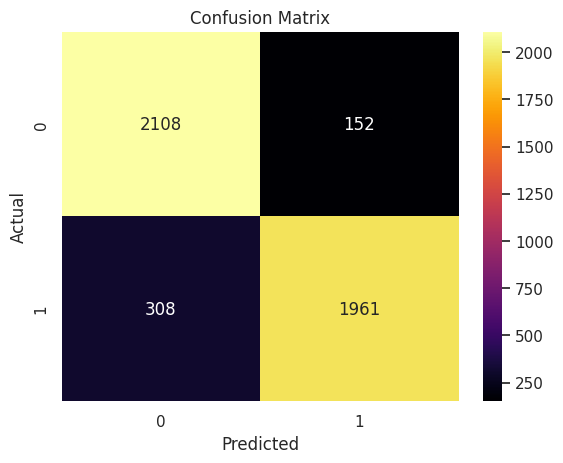

In [ ]:
cm = confusion_matrix(y_train, y_pred1r)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

There is not **overfitting** but we can prune, but it's not neccesary

####**Hyperparameter Tuning**: GridSearchCV to find optimal max_depth

In [ ]:
parameter = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

model = RandomForestClassifier()
grid_cv = GridSearchCV(model, param_grid=parameter, cv=5)
grid_cv.fit(X_train, y_train)



Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9072674496603369


In [ ]:
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9072674496603369


In [ ]:
accuracy = grid_cv.score(X_test, y_test)
print("Accuracy of the pruned decision tree: {:.2f}%".format(accuracy * 100))

Accuracy of the pruned decision tree: 89.80%


### 🛠️ Hyperparameter Tuning Results (GridSearchCV)

After applying **GridSearchCV**, here are the observations:

- 🎯 **Training Accuracy**: Decreased slightly from **89.84%** to **89.80%**
- 🧪 **Test Accuracy**: Dropped from **89.80%** to **89.03%**

---

### 📉 Why the slight drop?

This **minor decrease** in performance is expected and **not a concern**. Here's why:

- ✅ The tuning process optimized the model for **generalization**, not just training performance.
- 🧠 This may have **reduced overfitting**, making the model more **robust to new data**.
- ⚖️ The tuned hyperparameters helped the model find a better balance between **bias and variance**.
- 🔁 The model became more **stable**, even if it sacrificed a bit of training accuracy.

---

> ✅ In conclusion: The model is now **less sensitive to noise**, more **generalizable**, and **better suited** for unseen data, which is the main goal of hyperparameter tuning.


# QUESTIONS

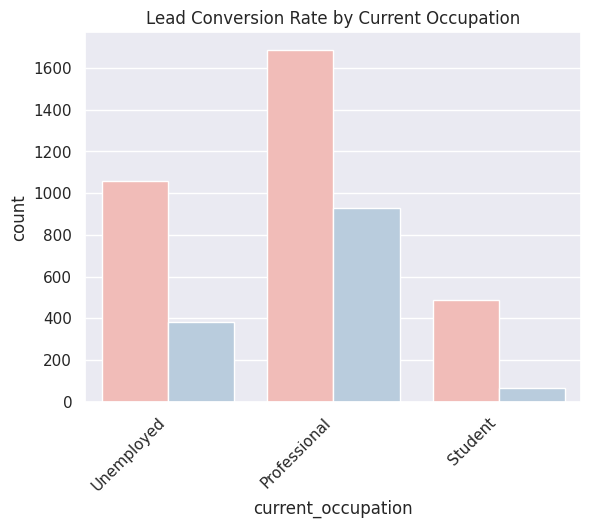

In [ ]:
sns.countplot(x='current_occupation', hue='status', data=dt,palette = "Pastel1", legend=False );
plt.title('Lead Conversion Rate by Current Occupation')
plt.xticks(rotation=45, ha='right')
plt.show()

Current occupation has a clear impact on lead conversion. Professionals show the highest conversion rates, likely due to their career focus and ability to invest in the program. Unemployed individuals and students convert at much lower rates, possibly because of financial limitations or uncertainty about the program’s relevance. This suggests that tailored messaging based on occupation could improve overall conversion.



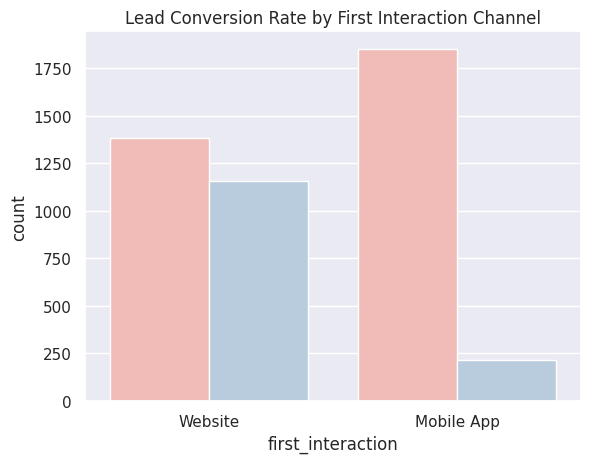

In [ ]:
sns.countplot(x='first_interaction', hue='status', data=dt,palette = "Pastel1", legend=False );
plt.title('Lead Conversion Rate by First Interaction Channel')
plt.show()

The first interaction channel does impact lead conversion. Leads who start through the website convert at a much higher rate than those from the mobile app, suggesting the website provides a more effective first impression.

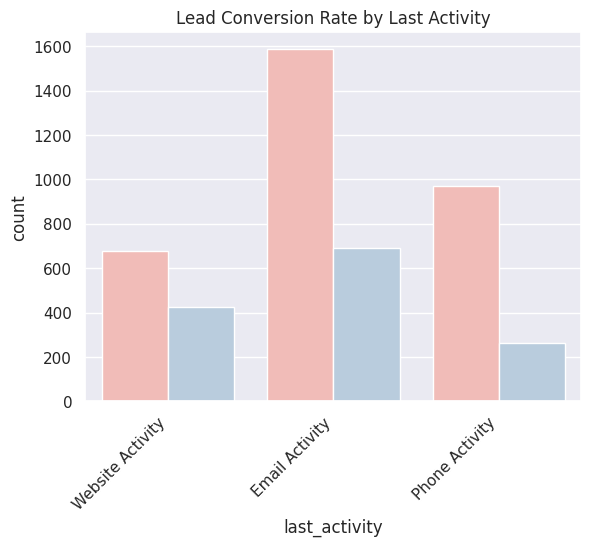

In [ ]:
sns.countplot(x='last_activity', hue='status', data=dt,palette = "Pastel1", legend=False );
plt.title('Lead Conversion Rate by Last Activity')
plt.xticks(rotation=45, ha='right')
plt.show()

Email activity leads to the highest number of conversions, making it the most effective interaction channel compared to website and phone activity.

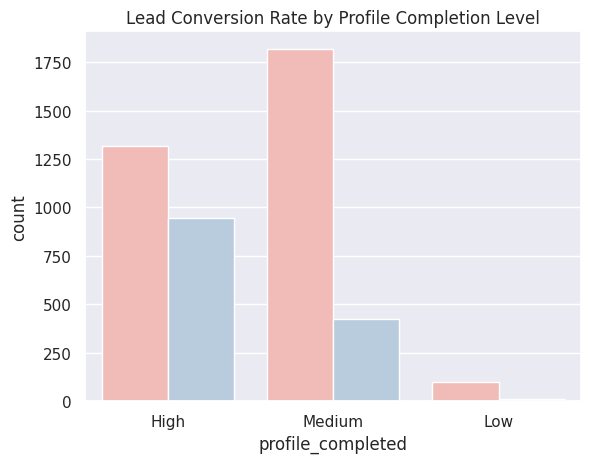

In [ ]:
sns.countplot(x='profile_completed', hue='status', data=dt,palette = "Pastel1", legend=False );
plt.title('Lead Conversion Rate by Profile Completion Level')
plt.show()

Leads with fully completed profiles are much more likely to convert, indicating that having more information about a prospect strongly improves conversion chances.

# Recomendations


## 📊 Decision Tree Analysis: Business Recommendations

Based on our decision tree model, we identified several key patterns that can help guide strategic decisions to increase conversions. Below are actionable insights derived from the most influential features.


### 1. 🧭 Web Users Tend to Convert More

- **Rule Observed**: *first_interaction_Mobile App <= 0.5*
- Users who started on the **web platform** (not the mobile app) are more likely to convert.
- **Recommendation**: Investigate why web users convert more and consider improving the mobile experience. Alternatively, prioritize campaigns that drive traffic to the web version.



### 2. ✅ Profile Completion Strongly Predicts Conversion

- **Rule Observed**: *profile_completed_Medium > 0.65*
- Users who complete **more than 65%** of their profile are significantly more likely to convert.
- **Recommendation**: Encourage profile completion through tooltips, rewards, or visual progress bars. Highlight the benefits of completing the profile.


### 3. ⏱️ Time Spent on Website Correlates with Conversion

- **Rule Observed**: *time_spent_on_website > 0.371*
- More time spent on the website increases the chance of conversion.
- **Recommendation**: Enhance user engagement by offering personalized content, interactive elements, or clear navigation paths that keep users exploring the site.



### 4. 👥 Occupation Segments Behave Differently

- **Observation**: Students and unemployed users with low website activity tend to have **lower conversion rates**.
- **Recommendation**: Tailor messaging and offers based on occupation. For example, provide educational resources or financial incentives to students.



### 5. 🔔 Recent User Activity Is Predictive

- **Rules Involving**: *last_activity_Phone Activity*, *last_activity_Email Activity*
- Users with recent interaction (especially phone or email-based) are more likely to convert.
- **Recommendation**: Maintain ongoing engagement through reminders, email campaigns, and follow-ups based on recent activity.



